In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# Define the transfer function in terms of the central frequency and quality factor
def transfer_function(f, f0, Q):
    w0 = 2 * np.pi * f0
    w = 2 * np.pi * f
    x= w/w0
    return 1/(1+1.j*Q*(x-1/(x+1e-16)))

,Variable,Real Value,Approximate Value for 0.01 s
0,f0,58000.0,57956.439604
1,Q,100.0,61.000000
2,beta,580.0,950.105567


,Variable,Real Value,Approximate Value for 0.04 s
0,f0,58000.0,57964.110114
1,Q,100.0,103.044444
2,beta,580.0,562.515625


,Variable,Real Value,Approximate Value for 0.07 s
0,f0,58000.0,58022.349561
1,Q,100.0,94.453488
2,beta,580.0,614.295465


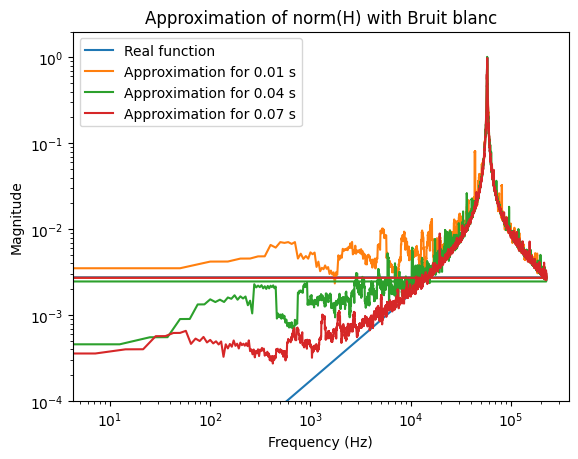

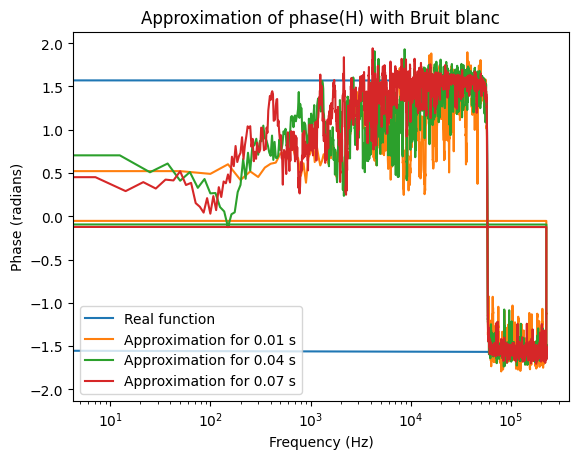

In [2]:
# Optimisation "Timelenght"

# Define the different timelenghts to compare
diff_timelenght=[0.01, 0.04, 0.07]

# Define empty arrays
frequencies2_array = []
TF_approx_norm_array = []
TF_approx_angle_array = []

for time in diff_timelenght:
    # Parameters of transfer function
    Q = 100
    f0 = 58000
    samplingf = 450000 #(Hz)

    ######
    timelenght = time  #(s)
    ######

    N = int(samplingf*timelenght) # number of points
    beta = f0/Q

    t = np.linspace(0, timelenght, N, endpoint=False) # Definition of time vector
    frequencies = np.fft.fftfreq(len(t), d=t[1]-t[0]) # Definition of associated frequencies vector

    TF_values = transfer_function(frequencies, f0, Q) # Calculation of trnasfert function (TF :TransferFunction)
    transNorm = np.absolute(TF_values)
    transAngle = np.angle(TF_values)
    TF_time_values = np.fft.ifft(np.fft.ifftshift(TF_values))

    #Define input signal
    input_signal = np.random.normal(0, 1, N) # White noise
    type_signal='Bruit blanc'

    #Calculation of output signal
    input_signal_freq = np.fft.fft(input_signal)

    output_signal_freq = TF_values*input_signal_freq
    output_signal = np.real(np.fft.ifft(output_signal_freq))

    
    Rxx = np.fft.fft(np.correlate(input_signal, input_signal, mode='full'))
    Rxy = np.fft.fft(np.correlate(output_signal, input_signal, mode='full'))

    frequencies2 = np.fft.fftfreq(len(Rxy),1/samplingf )

    H_approx = Rxy/Rxx

    TF_approx_norm_rough = np.absolute(H_approx)
    TF_approx_angle_rough = np.angle(H_approx)

    # Apply a moving average to smooth curve
    window_size = 15  # Adjust the window size as needed
    TF_approx_norm = np.convolve(TF_approx_norm_rough, np.ones(window_size)/window_size, mode='same')
    TF_approx_angle = np.convolve(TF_approx_angle_rough, np.ones(window_size)/window_size, mode='same')

    # Calculation of Q and f_0
    max_TF_approx= max(TF_approx_norm)
    maxArg_TF_approx = np.argmax(TF_approx_norm[:int(N/2)]) #f0
    f0_approx = frequencies2[maxArg_TF_approx]

    threshold = 1/np.sqrt(2)
    target_norm = threshold * max_TF_approx

    # Lower frequency
    lower_bandwidth_index = (np.abs(np.array(TF_approx_norm[:maxArg_TF_approx]) - target_norm)).argmin()
    lower_bandwidth_freq = frequencies2[lower_bandwidth_index]

    # Upper frequency
    upper_bandwidth_index = (np.abs(np.array(TF_approx_norm[maxArg_TF_approx:int(N)]) - target_norm)).argmin() + maxArg_TF_approx
    upper_bandwidth_freq = frequencies2[upper_bandwidth_index]

    beta_approx = upper_bandwidth_freq - lower_bandwidth_freq

    Q_approx = f0_approx/beta_approx

    # Append values for all the different times
    frequencies2_array.append(frequencies2)
    TF_approx_norm_array.append(TF_approx_norm)
    TF_approx_angle_array.append(TF_approx_angle)

    # Show approximations
    data_smooth = {
        'Variable': [r'f0', r'Q', r'beta'],
        'Real Value': [f0, Q, beta],
        f'Approximate Value for {time} s': [f0_approx, Q_approx, beta_approx],
    }

    df_smooth = pd.DataFrame(data_smooth)
    display(df_smooth)

# Plot Bode Diagrams (with different timelengths)
plt.figure()
plt.loglog(frequencies, transNorm, label = 'Real function')
for i in range(len(diff_timelenght)):
    plt.loglog(frequencies2_array[i], TF_approx_norm_array[i], label = f'Approximation for {diff_timelenght[i]} s')
plt.ylim(0.0001,2)
plt.title(f'Approximation of norm(H) with {type_signal}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.figure()
plt.semilogx(frequencies, transAngle, label = 'Real function')
for i in range(len(diff_timelenght)):
    plt.semilogx(frequencies2_array[i], TF_approx_angle_array[i], label = f'Approximation for {diff_timelenght[i]} s')
plt.title(f'Approximation of phase(H) with {type_signal}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

plt.show()

In [3]:
# Code for 30 iterations (BAD)

# Number of times to run the code
num_iterations = 30

# Lists to store results for each iteration
results_Q = np.zeros(30)
results_B = np.zeros(30)
results_f0 = np.zeros(30)

for i in range(num_iterations):
    # Your code for calculating the approximations

    # Define the transfer function in terms of the central frequency and quality factor
    def transfer_function(f, f0, Q):
        w0 = 2 * np.pi * f0
        w = 2 * np.pi * f
        x= w/w0
        return 1/(1+1.j*Q*(x-1/(x+1e-16)))

    # Parameters of transfer function
    Q = 20
    f0 = 1000
    samplingf = 10000 #(Hz)
    timelenght = 0.01 #(s)
    # ############################### #

    N = int(samplingf*timelenght) # number of points
    beta = f0/Q

    t = np.linspace(0, timelenght, N, endpoint=False) # Definition of time vector
    frequencies = np.fft.fftfreq(len(t), d=t[1]-t[0]) # Definition of associated frequencies vector


    TF_values = transfer_function(frequencies, f0, Q) # Calculation of trnasfert function (TF :TransferFunction)
    transNorm = np.absolute(TF_values)
    transAngle = np.angle(TF_values)
    TF_time_values = np.fft.ifft(np.fft.ifftshift(TF_values))

    #Define input signal
    input_signal = np.random.normal(0, 1, N) # White noise
    type_signal='Bruit blanc'

    #Calculation of output signal
    input_signal_freq = np.fft.fft(input_signal)

    output_signal_freq = TF_values*input_signal_freq
    output_signal = np.real(np.fft.ifft(output_signal_freq))

    
    Rxx = np.fft.fft(np.correlate(input_signal, input_signal, mode='full'))
    Rxy = np.fft.fft(np.correlate(output_signal, input_signal, mode='full'))

    frequencies2 = np.fft.fftfreq(len(Rxy),1/samplingf )

    H_approx = Rxy/Rxx

    TF_approx_norm = np.absolute(H_approx)
    TF_approx_angle = np.angle(H_approx)


    TF_approx_norm = np.absolute(H_approx)
    TF_approx_angle = np.angle(H_approx)

    # Calculation of Q and f_0
    max_TF_approx= max(TF_approx_norm)
    maxArg_TF_approx = np.argmax(TF_approx_norm[:int(N/2)]) #f0
    f0_approx = frequencies2[maxArg_TF_approx]

    threshold = 1/np.sqrt(2)
    target_norm = threshold * max_TF_approx

    # Lower frequency
    lower_bandwidth_index = (np.abs(np.array(TF_approx_norm[:maxArg_TF_approx]) - target_norm)).argmin()
    lower_bandwidth_freq = frequencies2[lower_bandwidth_index]

    # Upper frequency
    upper_bandwidth_index = (np.abs(np.array(TF_approx_norm[maxArg_TF_approx:int(N)]) - target_norm)).argmin() + maxArg_TF_approx
    upper_bandwidth_freq = frequencies2[upper_bandwidth_index]

    beta_approx = upper_bandwidth_freq - lower_bandwidth_freq

    Q_approx = f0_approx/beta_approx

    # Append the result to the list
    results_Q[i] = (Q_approx)
    results_B[i] = (beta_approx)
    results_f0[i] = (f0_approx)

# Calculate the average and standard deviation
avg_Q = np.mean(results_Q, axis=0)
avg_B = np.mean(results_B, axis=0)
avg_f0 = np.mean(results_f0, axis=0)
std_Q = np.std(results_Q, axis=0)
std_B = np.std(results_B, axis=0)
std_f0 = np.std(results_f0, axis=0)

print(f'Results for timelenght of {timelenght} seconds, sampling frequency of {samplingf} Hz and {num_iterations} iterations')
data = {
    'Variable': [r'f0', r'Q', r'beta'],
    'Real Value': [f0, Q, beta],
    'Approximate Value AVG': [avg_f0, avg_Q, avg_B],
    "Approximate Value STD": [std_f0, std_Q, std_B]
}

df = pd.DataFrame(data)
display(df)
print(f'Error for f0: {abs((avg_f0-f0)/f0)*100} %')
print(f'Error for Q: {abs((avg_Q-Q)/Q)*100} %')
print(f'Error for beta: {abs((avg_B-beta)/beta)*100} %')


Results for timelenght of 0.01 seconds, sampling frequency of 10000 Hz and 30 iterations


,Variable,Real Value,Approximate Value AVG,Approximate Value STD
0,f0,1000.0,1005.025126,121.714587
1,Q,20.0,8.080070,5.830415
2,beta,50.0,242.881072,323.092088


Error for f0: 0.50251256281407 %
Error for Q: 59.59965143715142 %
Error for beta: 385.7621440536012 %
